In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import minmax_scale
print('done')


done


In [2]:
mycsv = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')


In [3]:
mycsv.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


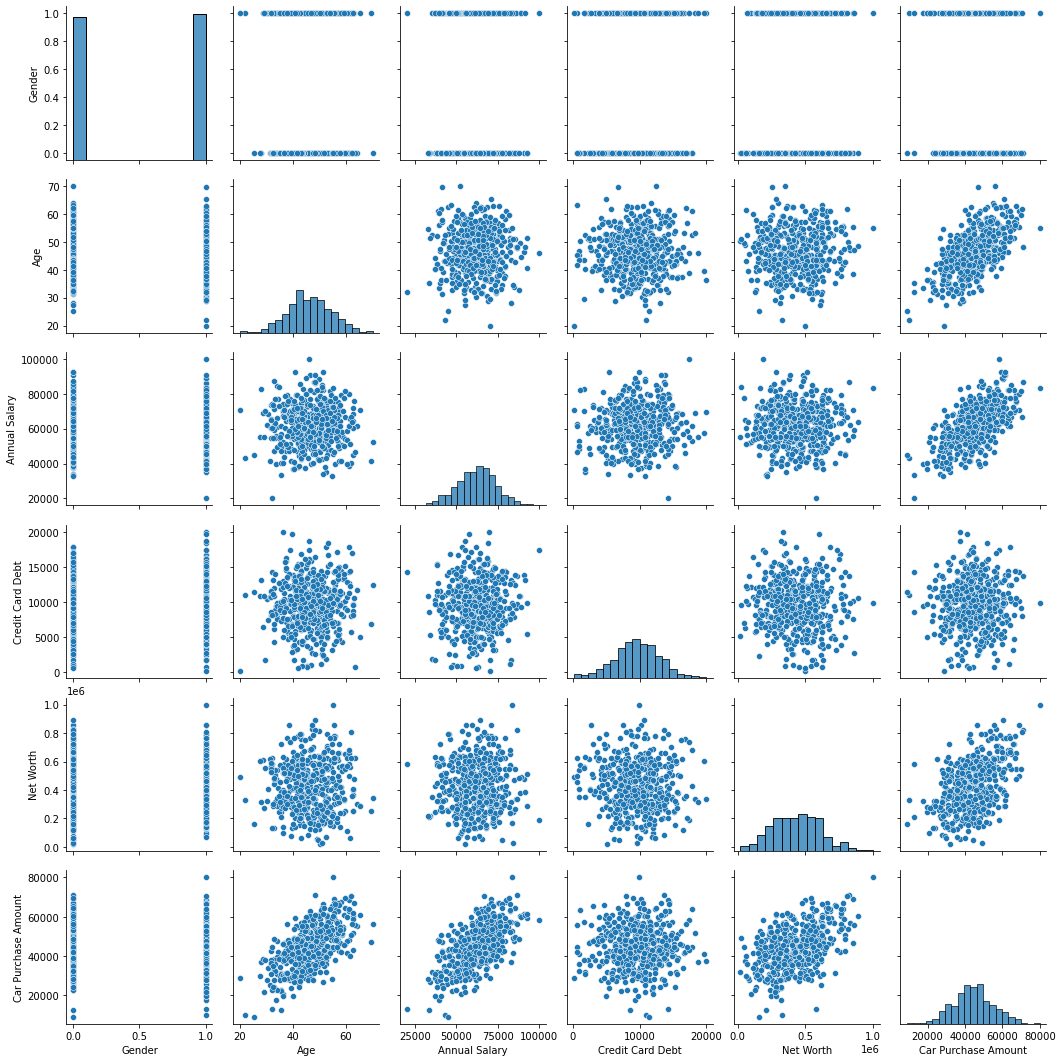

In [4]:
## visualization of correlation of features
sns.pairplot(mycsv)
## clearly, generally data is correlated with himself but the only outlier here is credit card debt
## credit card debt does not seem like have a correlation with buying expensive cars

In [5]:
mycsv.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
#country can be essential, so we need to encode categorical data to numerical data 
array = np.array(mycsv['Country']).reshape(-1,1)
encoder = OrdinalEncoder()
result = encoder.fit_transform(array)
mycsv['Country'] = result
mycsv

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,27.0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,17.0,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,1.0,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,41.0,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,26.0,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,128.0,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,208.0,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,144.0,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,24.0,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [7]:
#customer name , email does not needed and can  be dropped to a better ML
mycsv_cleaned = mycsv.drop(['Customer Name','Customer e-mail'], axis = 1)

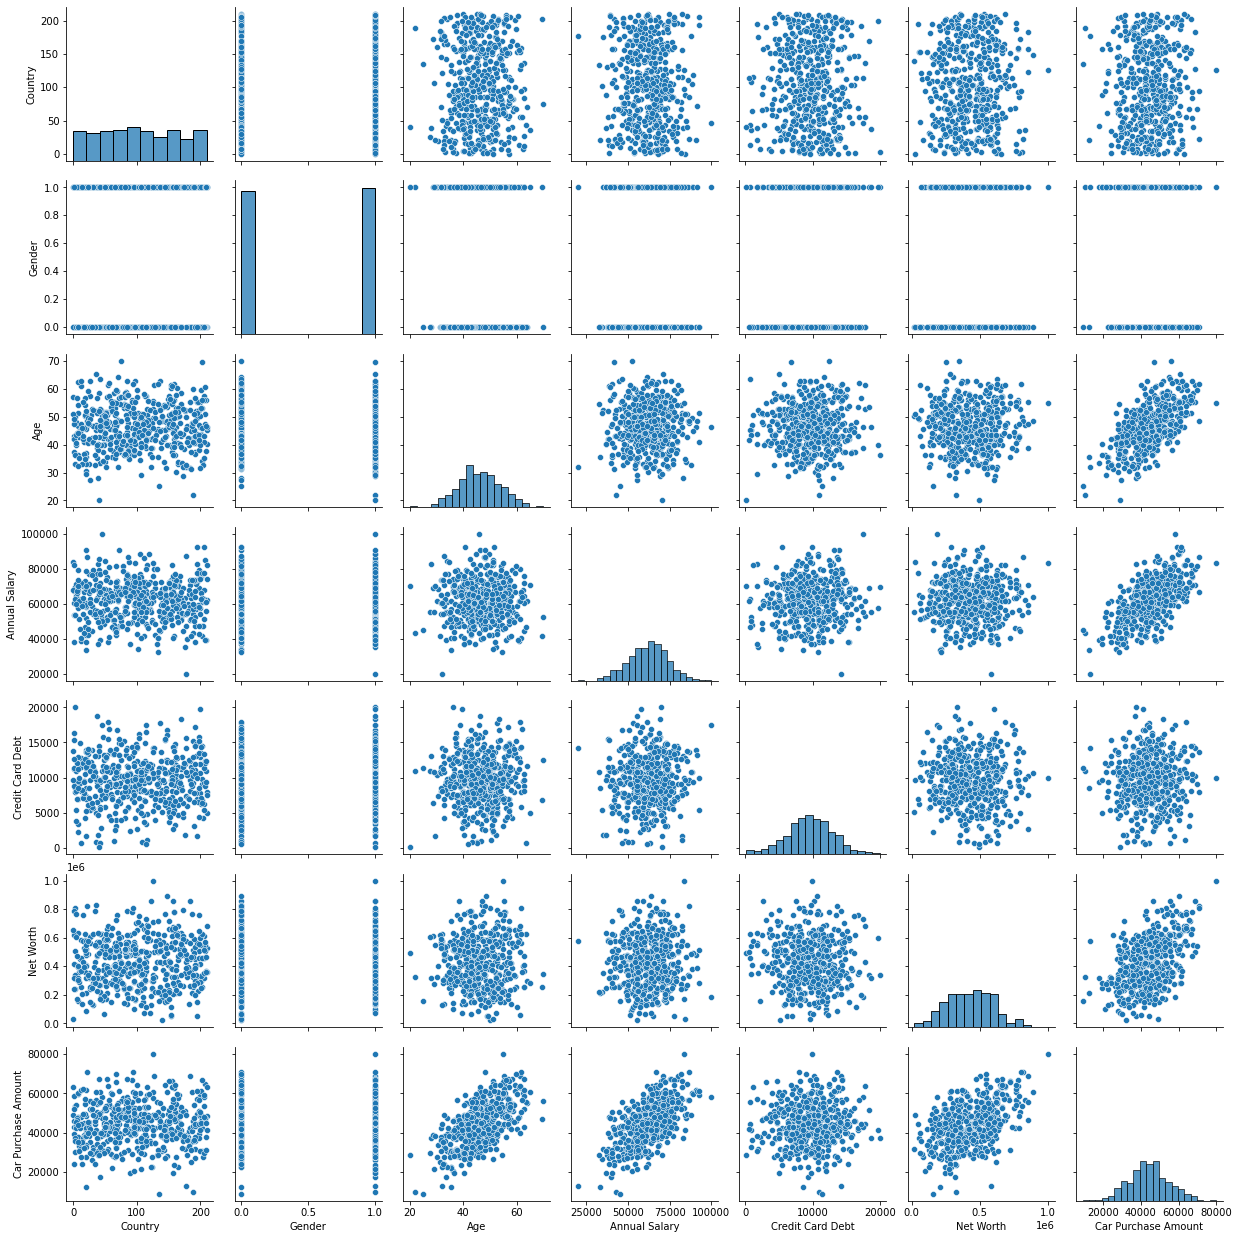

In [8]:
#again look for correlations because i changed the country, i will look for its correlation
sns.pairplot(mycsv)

In [9]:
y = mycsv_cleaned['Car Purchase Amount']
mycsv_cleaned = mycsv_cleaned.drop(['Car Purchase Amount'],axis=1)
## Input data became mycsv_cleaned and label data became y

In [10]:
print(y)

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64


In [11]:
x = mycsv_cleaned
mycsv_cleaned.head()

,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,27.0,0,41.851720,62812.09301,11609.380910,238961.2505
1,17.0,0,40.870623,66646.89292,9572.957136,530973.9078
2,1.0,1,43.152897,53798.55112,11160.355060,638467.1773
3,41.0,1,58.271369,79370.03798,14426.164850,548599.0524
4,26.0,1,57.313749,59729.15130,5358.712177,560304.0671


In [12]:
x.shape

(500, 6)

In [13]:
y.shape

(500,)

In [14]:
## normalization
x_scaled = minmax_scale(x)
x_scaled

array([[0.12857143, 0.        , 0.4370344 , 0.53515116, 0.57836085,
        0.22342985],
       [0.08095238, 0.        , 0.41741247, 0.58308616, 0.476028  ,
        0.52140195],
       [0.0047619 , 1.        , 0.46305795, 0.42248189, 0.55579674,
        0.63108896],
       ...,
       [0.68571429, 1.        , 0.67886994, 0.61110973, 0.52822145,
        0.75972584],
       [0.11428571, 1.        , 0.78321017, 0.37264988, 0.69914746,
        0.3243129 ],
       [0.9952381 , 1.        , 0.53462305, 0.51713347, 0.46690159,
        0.45198622]])

In [15]:
y_array = np.array(y).reshape(-1,1)
y_scaled = minmax_scale(y_array)
y_scaled.shape

(500, 1)

In [16]:
##now training phase
from sklearn.model_selection import train_test_split  

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_scaled,test_size=0.2)

In [18]:
x_train.shape

(400, 6)

In [19]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


In [20]:
print(x_train.shape,'\n==========================================')
print(y_train.shape, '\n=============================================')

(400, 6) 
(400, 1) 


In [21]:
model = Sequential()
model.add(Dense(20, activation='relu', input_shape = (6,),name='hiddenlayer1'))
model.add(Dense(20,activation='relu',name='hiddenlayer2'))
model.add(Dense(1,activation='linear' , name='outputlayer'))
model.summary()
model.compile(loss='mean_squared_error',optimizer=Adam())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiddenlayer1 (Dense)         (None, 20)                140       
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 20)                420       
_________________________________________________________________
outputlayer (Dense)          (None, 1)                 21        
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(x_train,y_train, epochs= 20, validation_split=0.2,batch_size=25,) 

Epoch 1/20
13/13 [==============================] - 1s 85ms/step - loss: 0.0282 - val_loss: 0.0199
Epoch 2/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0153 - val_loss: 0.0099
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0099 - val_loss: 0.0072
Epoch 4/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0076 - val_loss: 0.0057
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 0.0045
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0050 - val_loss: 0.0034
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0028
Epoch 8/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 9/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 10/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 11/20
13/13 

dict_keys(['loss', 'val_loss'])


Text(0, 0.5, 'loss')

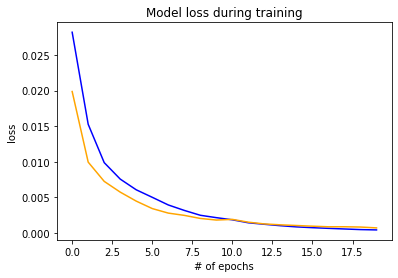

In [23]:
print(history.history.keys())
plt.plot(history.history['loss'], color = 'Blue')
plt.plot(history.history['val_loss'],color= 'Orange')
plt.title('Model loss during training')
plt.xlabel('# of epochs')
plt.ylabel('loss')

In [24]:
predicted = model.predict(x_test)

<ipython-input-25-c7eb831813d2>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


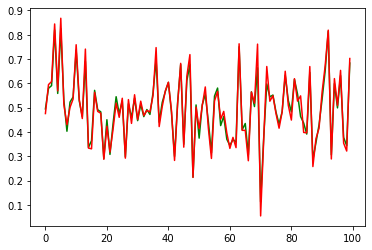

In [25]:
plt.plot(predicted, color='Green')
plt.subplot()
plt.plot(y_test,color='Red')

In [26]:
#country,gender, age, annual salary, creditcard debt, networth
x_takeinput= np.array([[160,1,50,50000,10000,60000]])
x_takeinput

array([[  160,     1,    50, 50000, 10000, 60000]])

In [27]:
y_predict = model.predict(x_takeinput)

In [28]:
print('expected car price is: ', y_predict)

expected car price is:  [[34872.957]]


In [29]:
model.save('mymodel')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: mymodel\assets


In [30]:
del model

In [31]:
from tensorflow.keras.models import load_model
model = load_model('mymodel')

In [32]:
y_predict = model.predict(x_takeinput)
print('expected car price is: ', y_predict)

expected car price is:  [[34872.957]]
